# *Pós-graduação em Ciência e Dados e Machine Learning*
### *Trabalho Final - Machine Learning*

**Disciplina:** Fundamentos de Machine Learning

**Professor:** André Juan Costa Vieira

**Turma:** A

**Nomes dos Integrantes:** 

1- Gustavo Maxwel de Sousa Oliveira

2-

3-

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

In [67]:
wines = pd.read_csv("wines.csv")
wines_splines = pd.read_csv("wines_splines.csv")

In [61]:
wines.head()

,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,6.6,0.42,0.33,2.8,0.034,15.0,85.0,0.99000,3.28,0.51,13.4,6
1,red,6.9,0.63,0.02,1.9,0.078,18.0,30.0,0.99712,3.40,0.75,9.8,5
2,white,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9
3,white,6.7,0.11,0.34,8.8,0.043,41.0,113.0,0.99620,3.42,0.40,9.3,7
4,white,7.1,0.20,0.34,16.0,0.050,51.0,166.0,0.99850,3.21,0.60,9.2,6


In [62]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   color                 6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [63]:
wines_splines.head()

,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,...,spl_ln_sugar_4_3,spl_ln_sugar_4_4,spl_ln_sugar_4_5,spl_ln_sugar_4_6,spl_ln_sugar_4_7,spl_ln_sugar_4_8,spl_ln_sugar_4_9,spl_ln_sugar_4_10,spl_ln_sugar_4_11,spl_ln_sugar_4_12
0,white,6.6,0.42,0.33,2.8,0.034,15.0,85.0,0.99000,3.28,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,red,6.9,0.63,0.02,1.9,0.078,18.0,30.0,0.99712,3.40,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,white,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,white,6.7,0.11,0.34,8.8,0.043,41.0,113.0,0.99620,3.42,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,white,7.1,0.20,0.34,16.0,0.050,51.0,166.0,0.99850,3.21,...,59.093785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
wines_splines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   color                 6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
 13  categ                 6497 non-null   int64  
 14  ln_sugar_1            6497 non-null   float64
 15  ln_sugar_2           

### Modelos não Supervisionados

**Utilize o dataset 'wines.csv' e 'wines_splines.csv'**

Chuck Norris tem um amigo famoso no mundo da ciência de dados, seu nome é Rocky Balboa. Em uma conversa sobre alguns métodos que podem ser utilizados para criar novos vetores (_features engineering_), o Sr.Rocky propôs que fossem utilizados Splines. Completamente emocionado com a ideia, Chuck decidiu aplicar esta técnica utilizando até a oitava potência. 

Ele pediu a você que fizesse um estudo comparativo utilizando o PCA. O intuito é analisar se a redução de dimensionalidade pode ser vantajosa para o dataset original e o dataset com Splines. 

1- Compare a variância explicada de cada um dos datasets

2- Explique porque o PCA seria, ou não uma boa abordagem para o dataset com Splines. Ademais, discorra sobre a influência de ruídos.

3- Utilize um loop "for" e crie uma condição para que, quando a variância for maior do que 0.92, seja retornado o número de features totais, faça para ambos datasets.

4- Qual seria o método mais indicado para redução de dimensionalidade nesse caso? 

### 1) Comparando a variância explicada de cada dataset

A variância explicada indica quanto da informação (ou dispersão) dos dados originais é preservada após a projeção em componentes principais.

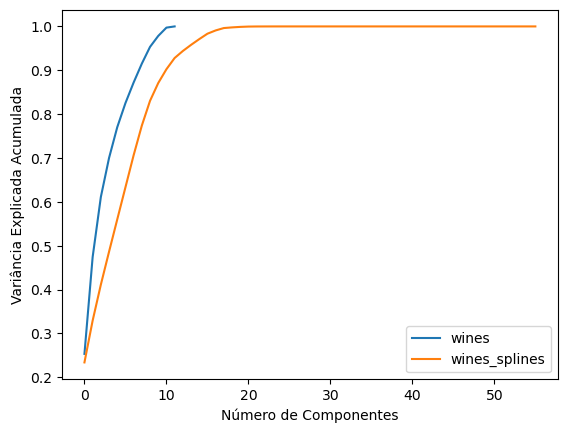

In [68]:
X1 = wines.drop(columns=['color'])
X2 = wines_splines.drop(columns=['color'])

scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)
X2_scaled = scaler.fit_transform(X2)

# PCA
pca1 = PCA().fit(X1_scaled)
pca2 = PCA().fit(X2_scaled)

# Variância explicada acumulada
var_exp1 = pca1.explained_variance_ratio_.cumsum()
var_exp2 = pca2.explained_variance_ratio_.cumsum()

# Comparação gráfica (opcional)
import matplotlib.pyplot as plt
plt.plot(var_exp1, label='wines')
plt.plot(var_exp2, label='wines_splines')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Acumulada')
plt.legend()
plt.show()

### 2) Por que o PCA pode ser bom ou ruim para o dataset com Splines (e o papel do ruído)

O PCA é um método linear — ele busca combinações lineares das variáveis que maximizem a variância. Isso funciona bem quando as relações entre variáveis são essencialmente lineares.

Agora, Splines são o oposto: eles introduzem não linearidades (curvaturas) e aumentam drasticamente o número de variáveis correlacionadas entre si.
O resultado prático:

O PCA pode capturar redundâncias, mas tende a misturar ruído com informação, pois os Splines geram muitas features com pequenas variações.

A primeira componente talvez explique muito pouco, e serão necessárias muitas componentes para atingir a mesma variância acumulada do dataset original.

Ruído amplifica esse problema.
Quando adicionamos polinômios ou splines até altas potências (como a oitava), pequenas variações nos dados originais são elevadas ao cubo, quarta... oitava!, tornando-se flutuações gigantescas.
O PCA não sabe distinguir se essa variância é informação ou ruído — ele apenas “ama” variância.

Em resumo:

Dataset original → PCA é eficiente.

Dataset com Splines → PCA tende a perder eficiência e gerar projeções com ruído embutido.

### 3) Loop para encontrar o número de componentes com variância > 0.92

In [70]:
for name, var_exp in zip(['wines', 'wines_splines'], [var_exp1, var_exp2]):
    for i, v in enumerate(var_exp):
        if v >= 0.92:
            print(f"{name}: {i+1} componentes necessários para explicar 92% da variância.")
            break

wines: 9 componentes necessários para explicar 92% da variância.
wines_splines: 12 componentes necessários para explicar 92% da variância.


### 4) Método mais indicado para redução de dimensionalidade nesse caso

Como o dataset com Splines contém relações altamente não lineares, o PCA (linear) não é o herói ideal. Métodos mais apropriados incluem:

Kernel PCA → usa funções kernel (como RBF) para capturar relações não lineares.

t-SNE → ótimo para visualização em 2D, mas não ideal para modelagem.

UMAP → muito eficiente, preserva tanto estrutura local quanto global.

Autoencoders (redes neurais) → capturam não linearidades complexas sem precisar de engenharia manual.

Em termos simples:
PCA é como usar uma régua para medir curvas — funciona, mas distorce. Métodos não lineares como Kernel PCA e UMAP são fitas flexíveis: se adaptam às curvas criadas pelos Splines.

Em síntese:

O PCA mostra-se eficiente no dataset original.

No dataset com Splines, ele sofre com alta dimensionalidade e ruído.

A variância explicada cresce mais lentamente com Splines.

Métodos não lineares são mais adequados para capturar a estrutura real desses dados.

**Utilize o dataset 'wines.csv'**

Uma ideia realmente interessante é a clusterização. Por vezes, podemos nos espantar com certos resultados. Aqui, você deve utilizar o dataset original e separar cada nota em um cluster. 

1- Validar os resultados do algoritmo Kmeans com o dataset original

2- Aplicar o método do Cotovelo e averiguar se o número de clusters apontados são iguais ao número de cluster que você tem de usar.

3- Utilizar o método da Silhueta e averiguar se o número de clusters apontados são iguais ao número de cluster que você tem de usar.

4- Explique os principais conceitos dos métodos das questões 2 e 3.

### 1) Validar os resultados do K-Means com o dataset original

In [71]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, adjusted_rand_score

In [72]:
df = pd.read_csv('wines.csv')

X = df.select_dtypes(include=['float64', 'int64']).drop(columns=['quality'])

In [73]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_clusters = df['quality'].nunique()

In [74]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

print("Adjusted Rand Index:", adjusted_rand_score(df['quality'], labels))

Adjusted Rand Index: 0.02309174057521027


In [75]:
df['cluster'] = labels
print(df.groupby('cluster')['quality'].mean())

cluster
0    5.403621
1    5.562842
2    6.284735
3    5.740642
4    5.380952
5    5.783117
6    5.869767
Name: quality, dtype: float64


### 2) Método do Cotovelo (Elbow Method)

In [76]:
import matplotlib.pyplot as plt

In [77]:
inertias = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

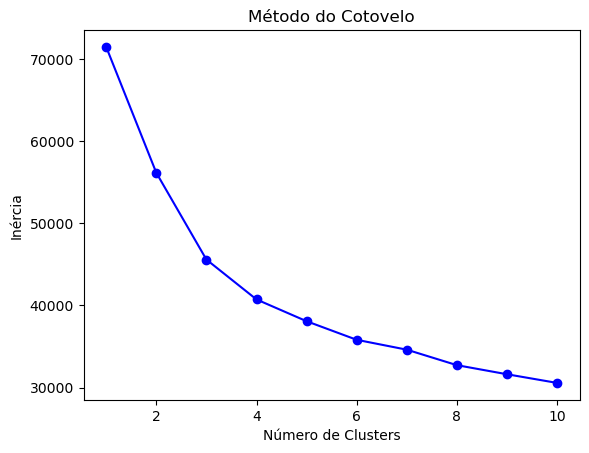

In [78]:
plt.plot(K, inertias, 'bo-')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()

### 3) Método da Silhueta

In [79]:
from sklearn.metrics import silhouette_score

In [80]:
silhouette_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

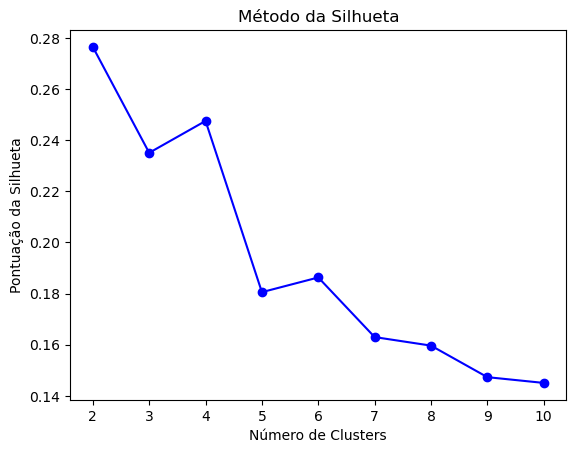

In [83]:
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Número de Clusters')
plt.ylabel('Pontuação da Silhueta')
plt.title('Método da Silhueta')
plt.show()

In [82]:
df["quality"].nunique()

7

### 4) Conceitos principais dos métodos

Método do Cotovelo
É baseado na inércia, que mede o quão compactos estão os clusters. Cada ponto é comparado com o centróide do seu grupo, e a soma dessas distâncias forma a inércia total.
À medida que você adiciona mais clusters, a inércia diminui, mas em algum ponto a redução se estabiliza — o “cotovelo” é onde adicionar mais clusters não traz ganhos relevantes.

Método da Silhueta
Avalia o quão bem cada ponto está inserido em seu cluster em comparação com os demais.
É uma métrica mais geométrica e interpretável, pois considera tanto coerência interna quanto separação entre clusters.
Ela é especialmente útil quando não se sabe o número de grupos a priori.

Em resumo:

O K-Means agrupa amostras com base em distâncias.

O método do cotovelo verifica o ponto onde mais clusters não valem o custo.

O método da silhueta indica onde os grupos são mais bem definidos.

Se ambos sugerirem o mesmo número que as notas de quality, há uma estrutura coerente entre os dados e a avaliação humana.
Se não, Chuck Norris acabou de provar que os críticos de vinho não sabem o que estão fazendo.

Número de notas de qualidade (clusters esperados): 7
Adjusted Rand Index (ARI): 0.0231

Qualidade média em cada cluster encontrado:
cluster
0    5.403621
1    5.562842
2    6.284735
3    5.740642
4    5.380952
5    5.783117
6    5.869767
Name: quality, dtype: float64


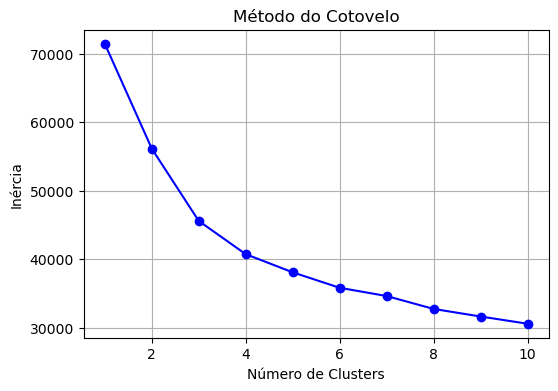

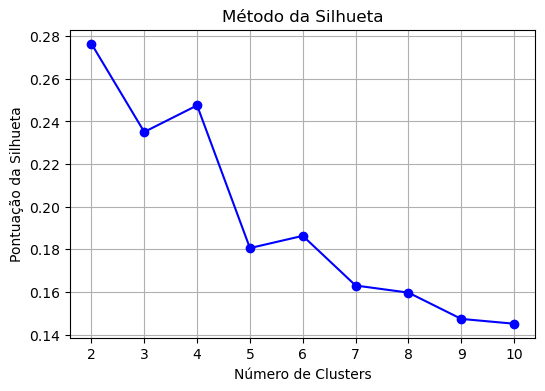

Número ótimo de clusters pelo método da Silhueta: 2


In [84]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score

# --- 1. CARREGAR E PREPARAR OS DADOS ---
df = pd.read_csv('wines.csv')

# Selecionar apenas colunas numéricas (sem 'color' e sem 'quality')
X = df.select_dtypes(include=['float64', 'int64']).drop(columns=['quality'])

# Padronização (essencial para K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Número de clusters baseado nas notas de qualidade
n_clusters = df['quality'].nunique()
print(f"Número de notas de qualidade (clusters esperados): {n_clusters}")

# --- 2. K-MEANS E VALIDAÇÃO ---
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

# ARI - mede similaridade entre clusters encontrados e as classes reais
ari = adjusted_rand_score(df['quality'], labels)
print(f"Adjusted Rand Index (ARI): {ari:.4f}")

# Qualidade média por cluster encontrado
df['cluster'] = labels
print("\nQualidade média em cada cluster encontrado:")
print(df.groupby('cluster')['quality'].mean())

# --- 3. MÉTODO DO COTOVELO ---
inertias = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertias, 'bo-')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.grid(True)
plt.show()

# --- 4. MÉTODO DA SILHUETA ---
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(6,4))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Número de Clusters')
plt.ylabel('Pontuação da Silhueta')
plt.title('Método da Silhueta')
plt.grid(True)
plt.show()

# Mostrar o número ótimo segundo a silhueta
best_k_silhouette = K[silhouette_scores.index(max(silhouette_scores))]
print(f"Número ótimo de clusters pelo método da Silhueta: {best_k_silhouette}")


In [85]:
df = pd.read_excel("logs_firewall.xlsx")
df.head()

,H,M,S,Nome,Maquina,IP
0,16,29,4,theteacher@empresax.COM.BR,empresaxLAB02$,192.168.100.57
1,14,12,4,pogó@empresax.COM.BR,empresaxLAB05$,192.168.100.66
2,12,55,4,jinx@empresax.COM.BR,empresaxLAB03$,192.168.100.60
3,18,22,4,kael-el@empresax.COM.BR,empresaxWKSLEN02$,192.168.100.55
4,12,3,4,maryjane@empresax.COM.BR,empresaxLAB04$,192.168.100.58


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1102 entries, 0 to 1101
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   H        1102 non-null   int64 
 1   M        1102 non-null   int64 
 2   S        1102 non-null   int64 
 3   Nome     1102 non-null   object
 4   Maquina  1102 non-null   object
 5   IP       1102 non-null   object
dtypes: int64(3), object(3)
memory usage: 51.8+ KB


**Utilize o dataset 'logs_firewall.xlsx'**

A Università di Bologna tem cursos de graduação e pós graduação em enologia. Os grandes enólogos do mundo são os únicos que podem fazer o doutorado nesta renomada universidade. Esta instituição tem um contrato milionário com o Sr.Donald, onde todos os alunos poderiam comparecer uma semana a cada três meses para estudar as características, mecânicas de plantações, tecnologias, processos de confecção dos vinhos, entre outras matérias. Todos os professores, escanções extremamente bem conceituados, sempre estão presentes. 

Caso infortúnio, O Sr.Hafþór Júlíus Björnsson, mais conhecido como "o Montanha", chefe de segurança cibernética da empresa apertou o botão DEFCON-1 ao perceber que os servidores tinham sido 'hackeados'. Momento em que notou que os bancos de dados que continham as notas dos vinhos haviam sido alterados/deletados e o backup infectado por um Ransomware chamado "HUE HUE HUE BR". Aparentemente, os black-hats conseguiram alterar de 5% a 25% dos dados referentes aos vinhos tintos, antes que o Montanha conseguisse exterminar as conexões dos servidores. 

O Sr.Donald Shelby aproximou-se para falar com você sobre as políticas da empresa, criadas por sua esposa, que dispunham sobre o bem estar, ambiente não tóxico, agregação dos "colaboradores" ~pseudo escravos~ como familiares, dentre outros ideais da mesma seara. Em seguida incorporou o espírito de Don Corleone e proferiu uma de suas máximas ao falar "Política é saber a hora de puxar o gatilho".   

Uma regra clara da empresa dispõe sobre a impossibilidade de extrair datasets como arquivos e, toda vez que for utilizar os dados no Jupyter Notebook, deve ser realizado uma query no datalake. Ocorre que, 'sem querer querendo', você estava "desatento" e salvou os dados para estudos quando estivesse em casa. Nítido que se disse-se que havia copiado quaisquer dados seria torturado, por isso não poderia simplesmente colocá-los de volta no banco e, como não queria morrer, tinha de encontrar vias oblíquas para dirimir a questão. 

Erick Cartman, analista de infraestrutura, recebeu ordens para recuperar os dados a qualquer custo e, caso falhasse, seria devidamente penalizado ~executado~. Desolado, regado a fanta uva, com palavras arrastadas e chiadas, Erick lhe pediu ajuda. Com muita pena, pegou seu disquete que continha a cópia dos dados e o entregou, pedindo extrema confidencialidade.

Para sua surpresa, após ter a vida salva, receber aumentos salariais e bonificações, Erick te chantageou. "Agora pediram para eu analisar os logs do firewall que contém informações de acesso a servidores e descobrir os possíveis culpados. Eu não sei fazer isso não, 'ocê tá LOUKO'. Dá teus pulos aí se não eu te conto que você copia dados da empresa!!!"

Conhecedor de diversas técnicas para detecção de outliers, se lembrou de uma que já tinha experiência: Isolation Forest. 

1- Descubra o nome do responsável pelo o ataque.

**ps**: Recentemente houve um estudo estatístico que comprovou que existe um fator de risco em relação aos horários de acesso, são eles:  

Entre 09:00 às 12:00 o risco varia entre 0-10%

Entre 12:00 às 14:00 o risco varia entre 5-10%

Entre 14:00 às 19:00 o risco varia entre 0-10%

Entre 19:00 às 21:00 o risco varia entre 20-30%

Entre 21:00 às 23:00 o risco varia entre 40-50%

Entre 00:00 às 02:00 o risco varia entre 60-80%

Entre 02:00 às 06:00 o risco varia entre 80-100%

Entre 06:00 às 09:00 o risco varia entre 30-40%

**<u>Esse fator pode ser recriado usando o método 'random.uniform', com 'seed' = 64.</u>**

In [87]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder

In [88]:
# Criar uma coluna com o horário em formato decimal (ex: 14.5 para 14:30)
df["hora_decimal"] = df["H"] + df["M"]/60 + df["S"]/3600

In [89]:
import random
random.seed(64)

def risco_por_hora(hora):
    if 9 <= hora < 12:
        return random.uniform(0, 0.10)
    elif 12 <= hora < 14:
        return random.uniform(0.05, 0.10)
    elif 14 <= hora < 19:
        return random.uniform(0, 0.10)
    elif 19 <= hora < 21:
        return random.uniform(0.20, 0.30)
    elif 21 <= hora < 23:
        return random.uniform(0.40, 0.50)
    elif 0 <= hora < 2:
        return random.uniform(0.60, 0.80)
    elif 2 <= hora < 6:
        return random.uniform(0.80, 1.00)
    elif 6 <= hora < 9:
        return random.uniform(0.30, 0.40)
    else:
        return 0

df["risco_horario"] = df["H"].apply(risco_por_hora)


In [90]:
le_nome = LabelEncoder()
le_maquina = LabelEncoder()
le_ip = LabelEncoder()

df["Nome_cod"] = le_nome.fit_transform(df["Nome"])
df["Maquina_cod"] = le_maquina.fit_transform(df["Maquina"])
df["IP_cod"] = le_ip.fit_transform(df["IP"])


In [91]:
X = df[["hora_decimal", "risco_horario", "Nome_cod", "Maquina_cod", "IP_cod"]]

iso = IsolationForest(contamination=0.02, random_state=42)
df["anomaly"] = iso.fit_predict(X)


In [92]:
suspeitos = df[df["anomaly"] == -1]
responsavel = suspeitos["Nome"].value_counts().idxmax()

print("Responsável provável pelo ataque:", responsavel)


Responsável provável pelo ataque: mutley@empresax.COM.BR


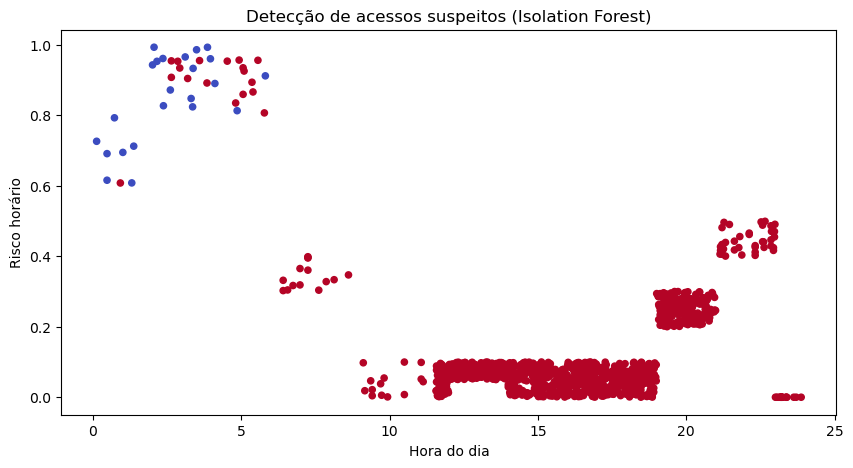

In [93]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.scatter(df["hora_decimal"], df["risco_horario"], c=df["anomaly"], cmap="coolwarm", s=20)
plt.xlabel("Hora do dia")
plt.ylabel("Risco horário")
plt.title("Detecção de acessos suspeitos (Isolation Forest)")
plt.show()
